Models based on single trees or rules, however, do have particular weaknesses. Two well-known weaknesses are
- (1) model instability (i.e., slight changes in the data can drastically change the structure of the tree or rules and, hence, the interpretation) and
- (2) less-than-optimal predictive performance. 

Basic Regression Trees
- The predictor to split on and value of the split
- The depth or complexity of the tree
- The prediction equation in the terminal nodes

>Tree models intrinsically conduct feature selection; if a predictor is never used in a split, the prediction equation is independent of these data. This advantage is weakened when there are highly correlated predictors. If two predictors are extremely correlated, the choice of which to use in a split is somewhat random. 

In [1]:
#data
library(AppliedPredictiveModeling)
data(solubility)
ls(pattern="^solT") 

[1] "solTestX"       "solTestXtrans"  "solTestY"       "solTrainX"     
[5] "solTrainXtrans" "solTrainY"

In [4]:
#data
library(AppliedPredictiveModeling)
library(caret)

data(solubility)
trn <- solTrainX[,-findCorrelation(cor(solTrainX))]
vld <- solTestX[,-findCorrelation(cor(solTestX))]

\begin{remark}
To tune an CART tree over the complexity parameter, the method option in the train function should be set to method = "rpart". To tune over maximum depth, the method option should be set to method="rpart2"
\end{remark}


In [9]:
#single trees
fit_tree <- train(solTrainXtrans,solTrainY,method = "rpart2",
                 tuneLength=10,trControl=trainControl(method = "cv"))
fit_tree$results

maxdepth,RMSE,Rsquared,MAE,RMSESD,RsquaredSD,MAESD
1,1.618610,0.3773936,1.2669221,0.12326704,0.05339085,0.11281269
2,1.433576,0.5050966,1.1333276,0.07896175,0.06740885,0.08398218
3,1.367012,0.5523346,1.0861536,0.08028157,0.06470701,0.07371673
4,1.262942,0.6182750,1.0085447,0.06973353,0.05534989,0.05844988
5,1.189582,0.6620358,0.9389860,0.05587609,0.04854973,0.05097687
6,1.139669,0.6866121,0.8986752,0.04949088,0.05524242,0.04461994
7,1.115016,0.7000287,0.8776503,0.05475764,0.05450043,0.04390446
8,1.086087,0.7161991,0.8480972,0.06524938,0.05488511,0.04433096
9,1.089323,0.7147209,0.8458780,0.06097842,0.05049405,0.04385528
10,1.053258,0.7338582,0.8135962,0.07212172,0.04783307,0.04795181


\begin{remark}
To tune a conditional inference tree over mincriterion, the method option in the train function should be set to method = "ctree". To tune over maximum depth, the method option should be set to method="ctree2".
\end{remark}


In [14]:
fit_ctree <- train(solTrainXtrans,solTrainY,method = "ctree2",
                 tuneLength=10,trControl=trainControl(method = "cv"))

In [22]:
fit_ctree$bestTune

,maxdepth,mincriterion
91,10,0.01


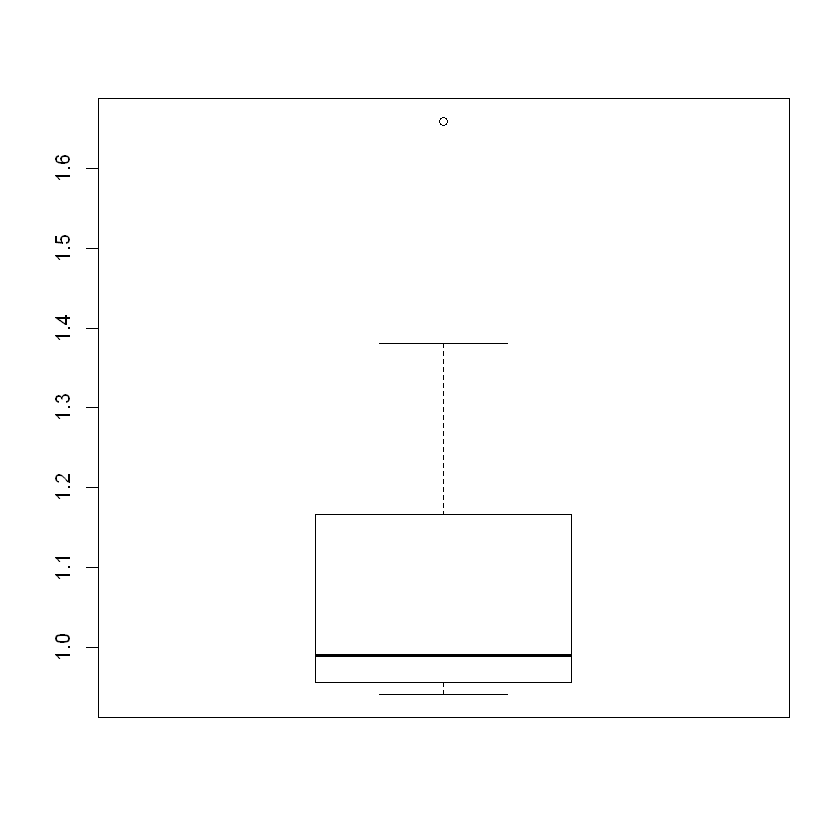

In [23]:
boxplot(fit_ctree$results$RMSE)

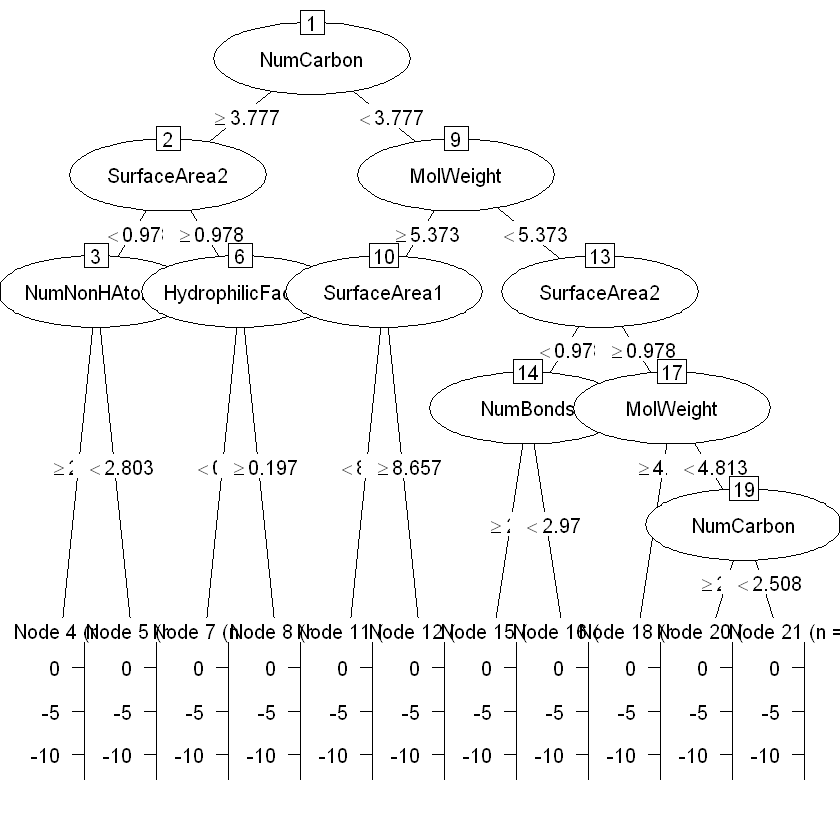

In [19]:
library(partykit)
library(party)
library(rpart)
df <- cbind(solTrainXtrans,solTrainY)
fit_tree <- rpart(solTrainY~.,data = df)
plot(as.party(fit_tree))

Regression Model Tree

> the same problem, although not as severe as with a single tree. One approach to dealing with this issue is to use a different estimator in the terminal nodes. Here we focus on the model tree approach described in Quinlan (1992) called M5, which is similar to regression trees except:

- The splitting criterion is different.
- The terminal nodes predict the outcome using a linear model (as opposed to the simple average).
- When a sample is predicted, it is often a combination of the predictions from different models along the same path through the tree.

In [29]:
#model trees
library(RWeka)
set.seed(100)
# library(RWeka)
# fit_mtree <- M5P(solTrainY~.,data = df,control=Weka_control(M=10))
fit_mtree <- train(solTrainXtrans,solTrainY,method = "M5",
                  trControl=trainControl(method = "cv"),
                   control = Weka_control(M = 10))

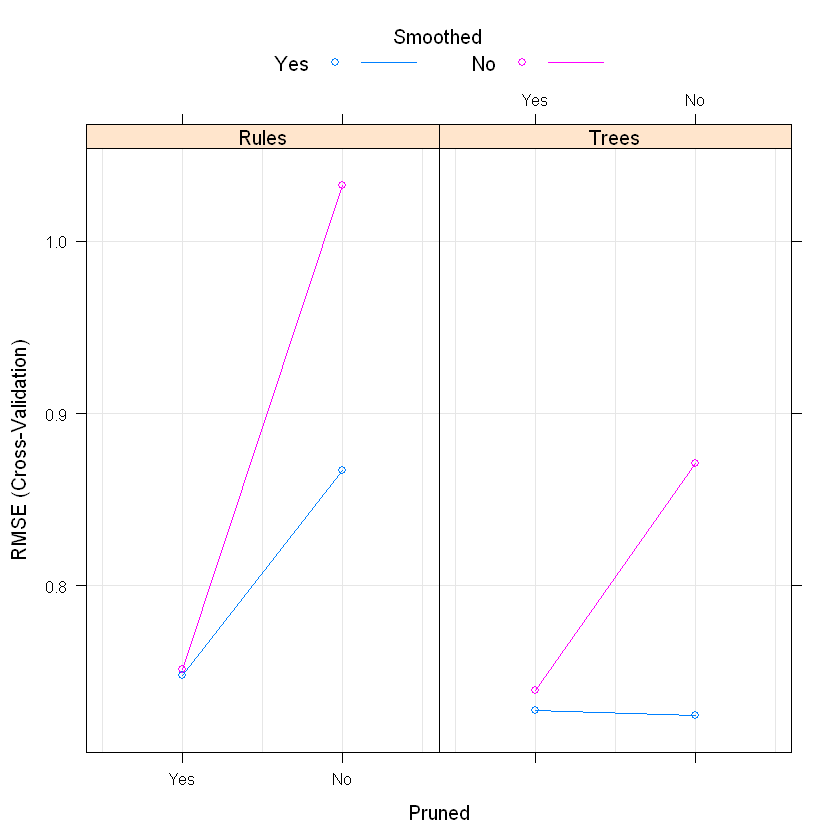

In [31]:
plot(fit_mtree)

In [32]:
fit_mtree$bestTune

,pruned,smoothed,rules
6,No,Yes,No


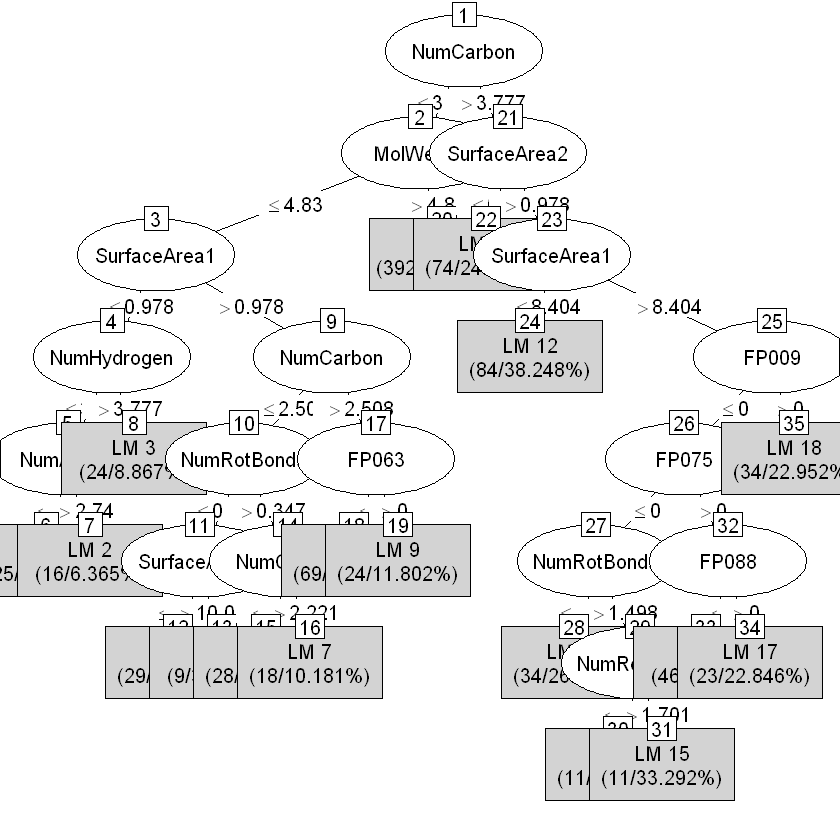

In [44]:
plot(fit_mtree)

In [3]:
# fit_rtree <- M5Rules(solTrainY~.,data = df)
# summary(fit_rtree)
set.seed(100)
fit_rtree <- train(solTrainXtrans,solTrainY,method = "M5Rules",
                  trControl=trainControl(method = "cv",number=3))

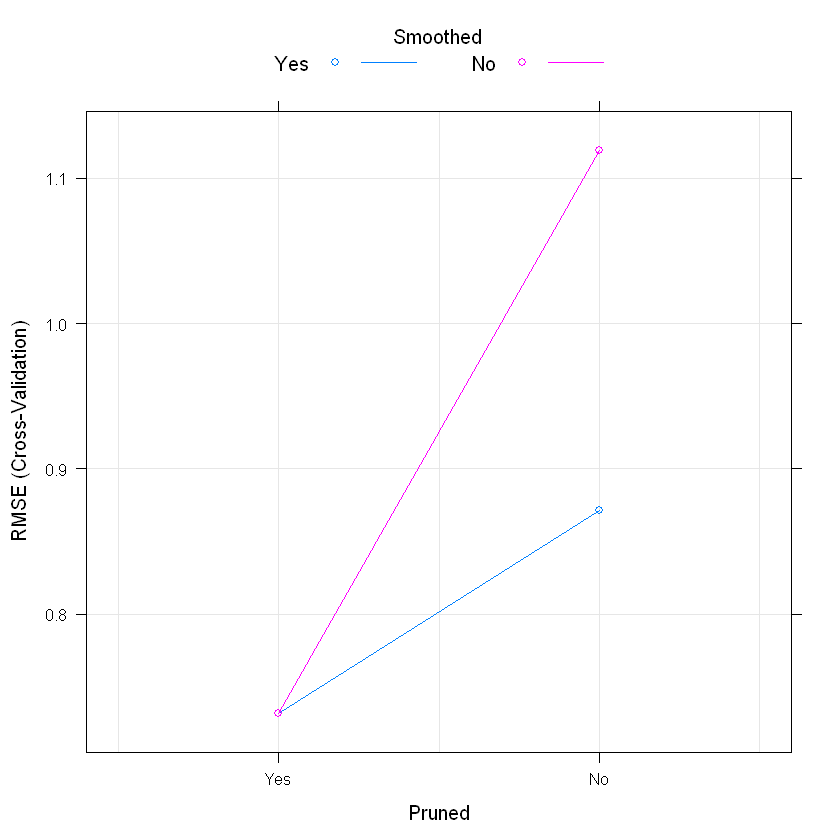

In [4]:
plot(fit_rtree)

In [6]:
fit_rtree$results

pruned,smoothed,RMSE,Rsquared,MAE,RMSESD,RsquaredSD,MAESD
Yes,Yes,0.7318775,0.8731118,0.5640544,0.08664484,0.009185247,0.06069194
Yes,No,0.7318775,0.8731118,0.5640544,0.08664484,0.009185247,0.06069194
No,Yes,0.8714670,0.8211761,0.6265014,0.06017128,0.012966834,0.02426115
No,No,1.1190916,0.7129676,0.8063540,0.11651258,0.025485595,0.04911878


Bagged Tree
Although bagging usually improves predictive performance for unstable models, there are a few caveats. 
- First, computational costs and memory requirements increase as the number of bootstrap samples increases.
- Another disadvantage to this approach is that a bagged model is much less interpretable than a model that is not bagged.

In [10]:
library(party)
df <- cbind(solTrainXtrans,solTrainY)
ctrl <- cforest_control(mtry=ncol(solTrainX))
fit_bagged <- cforest(solTrainY~.,data = df,controls = ctrl)

In [11]:
summary(fit_bagged)

      Length        Class         Mode 
           1 RandomForest           S4 

In [2]:
library(caret)
library(ipred)
fit_treebag <- train(solTrainXtrans,solTrainY,method = "treebag",
                    trControl=trainControl(method = "cv",number=5))
fit_treebag

Loading required package: lattice
Loading required package: ggplot2


Bagged CART 

951 samples
228 predictors

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 761, 761, 759, 761, 762 
Resampling results:

  RMSE       Rsquared   MAE      
  0.9107243  0.8061015  0.6919636


In [5]:
fit_treebag$results

parameter,RMSE,Rsquared,MAE,RMSESD,RsquaredSD,MAESD
none,0.9107243,0.8061015,0.6919636,0.07162046,0.03421537,0.07443517
